<a href="https://colab.research.google.com/github/chandrakar-shubham/Be-Zen-Data-Engineer-Assignment/blob/main/Data_Engineer_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Extraction of CSV file from Rar and storing it in Gdrive then import it in dataframe

In [ ]:
# path where rar is stored
path_rar = '/content/drive/MyDrive/BE ZEN/test.rar'


# path where to extract rar
path_to_extract = '/content/drive/MyDrive/BE ZEN'


#path which contains extracted csv

path_csv = '/content/drive/MyDrive/BE ZEN/2022_02_08-02_30_31_AM.csv'

In [ ]:
pip install unrar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install rarfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import rarfile

In [ ]:
rar = rarfile.RarFile(path_rar)
#rar.namelist()
#rar.printdir()
#rar.testrar()
#info = rar.infolist()[0]
#info.filename
#info.file_size
#17L
#info.date_time
rar.extractall(path = path_to_extract )

In [ ]:
df = pd.read_csv(path_csv)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730000 entries, 0 to 13729999
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   uuid              object
 1   price_string      object
 2   price_string_unf  object
 3   product_type      object
 4   level_1           object
 5   category          object
dtypes: object(6)
memory usage: 628.5+ MB


In [ ]:
df.head()

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw


#Data Cleaning after creating DataFrame

In [ ]:
#check for dupliated rows
no_of_duplicated_rows = len(df[df.duplicated()])
print(f'no of duplicated rows = {no_of_duplicated_rows}')

no of duplicated rows = 13728627


In [ ]:
#removing duplicated rows from df

df = df[~df.duplicated()]

In [ ]:
#info of df after removing duplicates

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1373 entries, 0 to 13511
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   uuid              1373 non-null   object
 1   price_string      551 non-null    object
 2   price_string_unf  31 non-null     object
 3   product_type      1372 non-null   object
 4   level_1           1368 non-null   object
 5   category          1372 non-null   object
dtypes: object(6)
memory usage: 75.1+ KB


In [ ]:
# no of rows with null price_string
price_string_null = len(df[df['price_string'].isnull()])
price_string_null

822

In [ ]:
# no of rows with non null price_string
price_string_not_null = len(df[~df['price_string'].isnull()])
price_string_not_null

551

In [ ]:
# no of rows with non null price_string_unf columns
price_string_not_null_unf = len(df[~df['price_string_unf'].isnull()])
price_string_not_null_unf

31

In [ ]:
pd.set_option('display.max_rows', 20)

In [ ]:
#checking df where price_string_not_null_unf is not null
df[~df['price_string_unf'].isnull()]

,uuid,price_string,price_string_unf,product_type,level_1,category
61,13724827-979f-4019-9ff1-b44e57af5802,NaN,Current price: \n$359.00,U3Ryb2xsZXJzL0NhciBzZWF0cy8gQWNjZXNzb3JpZXM,Q2FyIHNlYXRz,QmFieWNhcmU
115,8e4fdac3-afc9-4242-9136-90d13e116724,$6.75,$6.75,Q29mZmVlIEJlYW5z,RGFyayBSb2FzdA,Z3JvY2VyaWVz
116,53beedf4-ed7c-4407-9081-7ae41f3a7282,$15.00,$15.00,RG91Z2ggSmFy,UGxheWRvdWdoIC8gUGxheWRvaA,VG95cyBhbmQgR2FtZXM
176,d3a85b19-cf28-413a-b8ee-518622025bdd,$18.95,$18.95,QmFieSBXaXBlcw,QmFieSBXaXBlcw,QmFieWNhcmU
182,623f06c9-5147-471a-a58f-162caca48a32,$459.99,$459.99,U3Ryb2xsZXJzL0NhciBzZWF0cy8gQWNjZXNzb3JpZXM,Q2FyIHNlYXRz,QmFieWNhcmU
...,...,...,...,...,...,...
2321,2441f06d-3590-443c-9353-f2f06087d61b,NaN,$80 USD,TWF0ZXJuaXR5IERyZXNz,TWF0ZXJuaXR5IFBhcnR5IERyZXNz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
2322,35c758bf-2abd-4a52-af2f-fd7071a96d44,$52,$52 USD,TWF0ZXJuaXR5IFRzaGlydA,TWF0ZXJuaXR5IFRvcHM,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
3145,f2ed916d-c48d-4f63-bd5b-78c1d791025e,$198,$198.00,UGx1cyBzaXplIHdlYXI,SnVtcHN1aXQ,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
3533,e1e16396-463f-44f3-a4e9-4ef1a3cd6da0,$30.00,$30.00,UGV0IERvZyBTdXBwbGVtZW50cw,UGV0IERvZyBTdXBwbGVtZW50cw,cGV0IHN1cHBsaWVz


In [ ]:
#removing price_string_unf column from df because 
print(f'price_string_unf column has {(1-(price_string_not_null_unf/len(df)))*100} percent null value')
df.drop(columns = 'price_string_unf',inplace = True)

price_string_unf column has 97.74217042971594 percent null value


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1373 entries, 0 to 13511
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uuid          1373 non-null   object
 1   price_string  551 non-null    object
 2   product_type  1372 non-null   object
 3   level_1       1368 non-null   object
 4   category      1372 non-null   object
dtypes: object(5)
memory usage: 64.4+ KB


In [ ]:
# no of null product type
len(df[df['product_type'].isnull()])

1

In [ ]:
#drop null product type from df
df = df[~df['product_type'].isnull()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372 entries, 0 to 13511
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uuid          1372 non-null   object
 1   price_string  551 non-null    object
 2   product_type  1372 non-null   object
 3   level_1       1368 non-null   object
 4   category      1372 non-null   object
dtypes: object(5)
memory usage: 64.3+ KB


# Checking distribution products_type containing null and non null prices in column price_string

In [ ]:
df.groupby('product_type')['product_type'].count().sort_values(ascending = False)

product_type
U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM             20
V29tZW5zIHN3aW13ZWFy                            19
V29tZW5zIHdvcmt3ZWFyLyBvZmZpY2Ugd2Vhcg          17
UGxhbnQgYmFzZWQgUHJvdGVpbiBTdXBwbGVtZW50cw      15
V29tZW5zIFBhbnRz                                15
                                                ..
UG93ZXIgQWRhcHRlcnM                              1
SGlnaGxpZ2h0ZXJz                                 1
UEVUIFNUQUlOIFJFTU9WRVIvQ0xFQU5FUlM              1
U3Vuc2NyZWVu                                     1
UEVUIFNUQUlOIGFuZCBPRE9SIFJFTU9WRVIgLSBQT1VS     1
Name: product_type, Length: 321, dtype: int64

In [ ]:
type_of_products = pd.DataFrame(df.groupby('product_type')['product_type'].size().sort_values(ascending = False))

In [ ]:
type_of_products

,product_type
product_type,
U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,20
V29tZW5zIHN3aW13ZWFy,19
V29tZW5zIHdvcmt3ZWFyLyBvZmZpY2Ugd2Vhcg,17
UGxhbnQgYmFzZWQgUHJvdGVpbiBTdXBwbGVtZW50cw,15
V29tZW5zIFBhbnRz,15
...,...
UG93ZXIgQWRhcHRlcnM,1
SGlnaGxpZ2h0ZXJz,1
UEVUIFNUQUlOIFJFTU9WRVIvQ0xFQU5FUlM,1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Distribution type of products including null and non null prices')

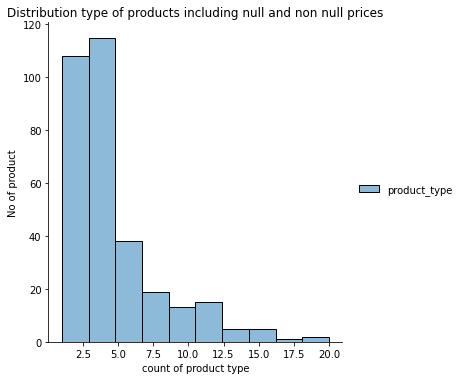

In [ ]:
#Distribution type of products including null and non null prices

sns.displot(type_of_products,bins = 10)

plt.xlabel("count of product type")
plt.ylabel("No of product")
plt.title("Distribution type of products including null and non null prices")

In [ ]:
#total product_type
len(list(df['product_type'].unique()))

321

# Checking distribution of level_1 containing null and non null prices in column price_string

In [ ]:
# total type of level 1
df.level_1 .value_counts()

U3dlYXRzaGlydA                  9
U29ja3M                         7
Q2xlYW5pbmcgY2xvdGg             7
U3Bvb24sIEtuaWZlIGFuZCBGb3Jr    7
U2hvcnQgc2xlZXZlIHRlZQ          6
                               ..
VHJhc2ggQmFncw                  1
UGlsbG93L0N1c2hpb24             1
TG9vbXM                         1
TWVucyBzbmVha2Vycw              1
UHVwcHkgU2hhbXBvbw              1
Name: level_1, Length: 595, dtype: int64

In [ ]:
#total null value in level 1

len(df[df['level_1'].isnull()])

4

In [ ]:
# data frame with type of level 1 and its count
type_of_level1 = pd.DataFrame(df.groupby('level_1')['level_1'].size().sort_values(ascending = False))


In [ ]:
type_of_level1

,level_1
level_1,
U3dlYXRzaGlydA,9
U29ja3M,7
Q2xlYW5pbmcgY2xvdGg,7
U3Bvb24sIEtuaWZlIGFuZCBGb3Jr,7
TG9uZyBzbGVldmUgdGVl,6
...,...
UHVwcHkgU2hhbXBvbw,1
QWxsLXB1cnBvc2Ugc2NydWIgYnJ1c2g,1
RGlzaCB3YXNoIHRhYmxldHMgc29hcA,1


Text(0.5, 1.0, 'Distribution level 1 including null and non null prices')

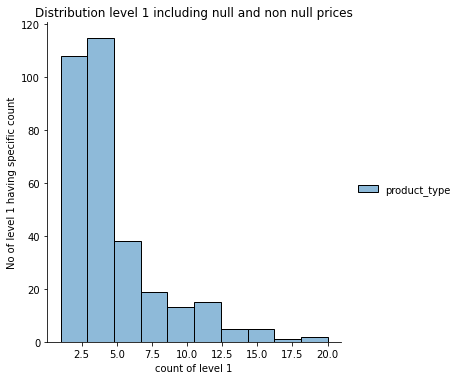

In [ ]:
# Distribution level 1 including null and non null prices

sns.displot(type_of_products,bins = 10)

plt.xlabel("count of level 1")
plt.ylabel("No of level 1 having specific count")
plt.title("Distribution level 1 including null and non null prices")

# Checking distribution of category containing null and non null prices in column price_string

In [ ]:
# total type of category and its count
df.category.value_counts()

Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz       391
Z3JvY2VyaWVz                           161
SG91c2Vob2xkIGFuZCBDbGVhbmluZw         157
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl       147
SGVhbHRo                                99
VG95cyBhbmQgR2FtZXM                     79
cGV0IHN1cHBsaWVz                        74
QmFieWNhcmU                             66
a2l0Y2hpbmcgYW5kIGRpbmluZw              59
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ     52
RWxlY3Ryb25pY3M                         32
QXJ0IHN1cHBsaWVz                        32
b2ZmaWNlIHByb2R1Y3Rz                    23
Name: category, dtype: int64

In [ ]:
#total null value in product_type

len(df[df['category'].isnull()])

0

In [ ]:
# data frame with type of category and its count
type_of_category = pd.DataFrame(df.groupby('category')['category'].size().sort_values(ascending = False))

type_of_category

,category
category,
Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,391
Z3JvY2VyaWVz,161
SG91c2Vob2xkIGFuZCBDbGVhbmluZw,157
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,147
SGVhbHRo,99
VG95cyBhbmQgR2FtZXM,79
cGV0IHN1cHBsaWVz,74
QmFieWNhcmU,66
a2l0Y2hpbmcgYW5kIGRpbmluZw,59


Text(0.5, 1.0, 'Distribution of type of category including null and non null prices')

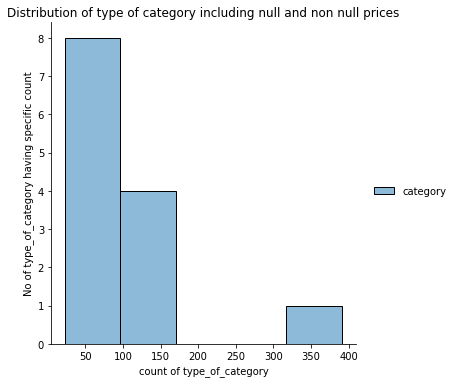

In [ ]:
#Distribution of type of category including null and non null prices

sns.displot(type_of_category,bins = 5)

plt.xlabel("count of type_of_category")
plt.ylabel("No of type_of_category having specific count")
plt.title("Distribution of type of category including null and non null prices")

# Checking Price_string column

In [ ]:
#converting price_string column datatype to string

df['price_string'] = df['price_string'].astype('string')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372 entries, 0 to 13511
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uuid          1372 non-null   object
 1   price_string  551 non-null    string
 2   product_type  1372 non-null   object
 3   level_1       1368 non-null   object
 4   category      1372 non-null   object
dtypes: object(4), string(1)
memory usage: 64.3+ KB


In [ ]:
df['price_string'].head(10)

0       <NA>
1       <NA>
2     $19.95
3     $92.00
4      11.50
5       <NA>
6     $24.99
7    $148.00
8        $89
9     $14.95
Name: price_string, dtype: string

# EDA on price string with NULL value and comparision with
1. product type vs null price_sring
2. category vs null price_sring
3. level 1 vs null price_sring

with charts

# Seperating data frame consisting of null prices in price_string columns

Creating data frame "price_null_df" with null price_string

In [ ]:
# creating data frame with null price_string
price_null_df= df[df['price_string'].isnull()]

In [ ]:
# null price and product list
product_with_price_null = price_null_df[['product_type','price_string']].reset_index()

# Count of Product type having  null price in price_string

In [ ]:
#count of product_type which has price null
count_of_product_with_null_price = len(product_with_price_null)
count_of_product_with_null_price

821

In [ ]:
# count of unique product with null prices

df.groupby('product_type')['price_string'].size()

product_type
Q0FUIExJVFRFUg                              3
Q29mZmVlIEJlYW5z                            8
Q29mZmVlIEZpbHRlcnM                         1
Q29uZGl0aW9uZXIgSGFpcg                      3
Q29va2llcw                                  3
                                           ..
cGV0IEJsYW5rZXQ                             2
cGV0IFN0YWluIGFuZCBvZG9yIGVsaW1pbmF0b3I     1
d29tZW5zIE91dGVyd2Vhcg                     15
d29tZW5zIFdhbGxldA                          3
d29tZW5zIHN3ZWF0ZXJz                       12
Name: price_string, Length: 321, dtype: int64

In [ ]:
unique_product_type_null_price_count_df = pd.DataFrame(df.groupby('product_type')['price_string'].size()).sort_values(by = 'price_string' ,ascending = False).reset_index()

In [ ]:
unique_product_type_null_price_count_df

,product_type,price_string
0,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,20
1,V29tZW5zIHN3aW13ZWFy,19
2,V29tZW5zIHdvcmt3ZWFyLyBvZmZpY2Ugd2Vhcg,17
3,UGxhbnQgYmFzZWQgUHJvdGVpbiBTdXBwbGVtZW50cw,15
4,V29tZW5zIFBhbnRz,15
...,...,...
316,UG93ZXIgQWRhcHRlcnM,1
317,SGlnaGxpZ2h0ZXJz,1
318,UEVUIFNUQUlOIFJFTU9WRVIvQ0xFQU5FUlM,1
319,U3Vuc2NyZWVu,1


In [ ]:
unique_product_type_null_price_coun_df = unique_product_type_null_price_count_df.rename(columns = {'price_string' : 'count'} )

In [ ]:
unique_product_type_null_price_coun_df =unique_product_type_null_price_coun_df[unique_product_type_null_price_coun_df['count']>0]

In [ ]:
unique_product_with_null_price_df = unique_product_type_null_price_coun_df.sort_values(by = 'count',ascending =False).reset_index()

In [ ]:
# creating data frame having group of unique product type and its counts

unique_product_with_null_price_df

,index,product_type,count
0,0,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,20
1,1,V29tZW5zIHN3aW13ZWFy,19
2,2,V29tZW5zIHdvcmt3ZWFyLyBvZmZpY2Ugd2Vhcg,17
3,3,UGxhbnQgYmFzZWQgUHJvdGVpbiBTdXBwbGVtZW50cw,15
4,4,V29tZW5zIFBhbnRz,15
...,...,...,...
316,288,RmFjZSBTY3J1YnM,1
317,289,S2V5Ym9hcmRz,1
318,290,Qm9keSBPaWwvIEVzc2VudGlhbCBPaWw,1
319,291,S2lkcyBDcmVhbXMgYW5kIExvdGlvbnM,1


Text(0.5, 1.0, 'Distribution Unique product with null price')

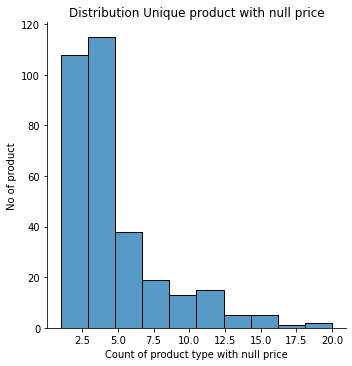

In [ ]:
#Distribution Unique product with null price

sns.displot(data=unique_product_type_null_price_coun_df,x = 'count',bins =10)

plt.xlabel("Count of product type with null price")
plt.ylabel("No of product")
plt.title("Distribution Unique product with null price")

In [ ]:
# top 10 product with null price 
top_product_null_value_count = unique_product_with_null_price_df.loc[:10]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

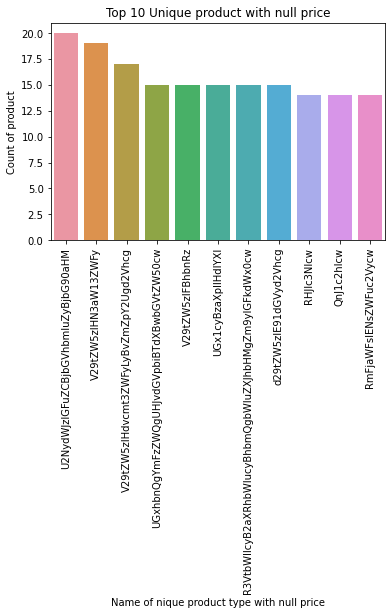

In [ ]:
sns.barplot(data=top_product_null_value_count,x = 'product_type',y = 'count')
plt.xlabel("Name of nique product type with null price")
plt.ylabel("Count of product")
plt.title("Top 10 Unique product with null price")
plt.xticks(rotation=90)

In [ ]:
price_null_df.head()

,uuid,price_string,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,<NA>,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,<NA>,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
5,389d9f75-cc3f-4bd2-94f7-93e381a3bed5,<NA>,TmF0dXJhbCBTd2VldGVuZXJzLyBTdWdhcg,TW9uayBGcnVpdA,Z3JvY2VyaWVz
13,1f2766ec-0a27-43f8-b28b-77a44492ead1,<NA>,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,U2NydWJz,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
16,7bad39f5-74b9-4611-afb9-46fb135190cd,<NA>,UGx1cyBzaXplIHdlYXIgZHJlc3M,RHJlc3M,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz


# Count of category with null price in price_string column

In [ ]:
#Check if category with null type with null price type exist


null_category = len(price_null_df[price_null_df['category'].isnull()])
print(f'No of null category with null price is = {null_category}')

No of null category with null price is = 0


In [ ]:
df.groupby('category')['price_string'].count()

category
Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz       186
QXJ0IHN1cHBsaWVz                        19
QmFieWNhcmU                              9
RWxlY3Ryb25pY3M                         11
SG91c2Vob2xkIGFuZCBDbGVhbmluZw          70
SGVhbHRo                                29
VG95cyBhbmQgR2FtZXM                     19
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ     20
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl        75
Z3JvY2VyaWVz                            48
a2l0Y2hpbmcgYW5kIGRpbmluZw              34
b2ZmaWNlIHByb2R1Y3Rz                    15
cGV0IHN1cHBsaWVz                        16
Name: price_string, dtype: int64

In [ ]:
categoty_with_null_price =pd.DataFrame(df.groupby('category')['price_string'].size()).sort_values(by = 'price_string' ,ascending = False).rename(columns = {'price_string' : 'count'} ).reset_index()

In [ ]:
categoty_with_null_price

,category,count
0,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,391
1,Z3JvY2VyaWVz,161
2,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,157
3,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,147
4,SGVhbHRo,99
5,VG95cyBhbmQgR2FtZXM,79
6,cGV0IHN1cHBsaWVz,74
7,QmFieWNhcmU,66
8,a2l0Y2hpbmcgYW5kIGRpbmluZw,59
9,VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,52


Text(0.5, 1.0, ' Distribution Unique category with null price')

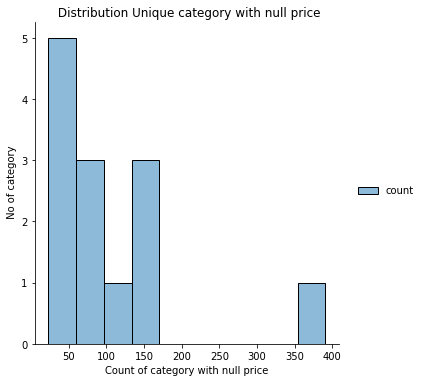

In [ ]:
sns.displot(data=categoty_with_null_price,bins = 10)
plt.xlabel("Count of category with null price")
plt.ylabel(" No of category")
plt.title(" Distribution Unique category with null price")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

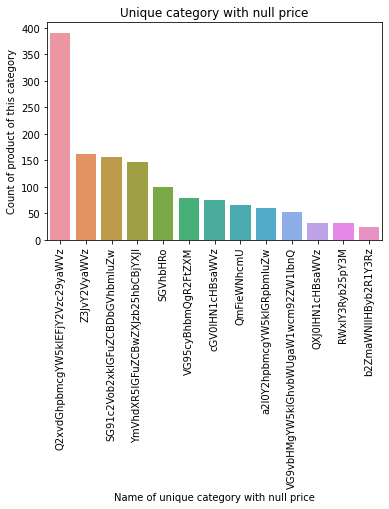

In [ ]:
sns.barplot(data=categoty_with_null_price,x = 'category',y = 'count')
plt.xlabel("Name of unique category with null price")
plt.ylabel("Count of product of this category")
plt.title("Unique category with null price")
plt.xticks(rotation=90)

# Count of level 1 having  null price in price_string column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372 entries, 0 to 13511
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uuid          1372 non-null   object
 1   price_string  551 non-null    string
 2   product_type  1372 non-null   object
 3   level_1       1368 non-null   object
 4   category      1372 non-null   object
dtypes: object(4), string(1)
memory usage: 64.3+ KB


In [ ]:
#Check if level 1 with null type with null price type exist


null_category = len(price_null_df[price_null_df['level_1'].isnull()])
print(f'No of null level 1 with null price is = {null_category}')

No of null level 1 with null price is = 3


In [ ]:
non_null_level1 = price_null_df[~price_null_df['level_1'].isnull()]

In [ ]:
level1_with_null_price =pd.DataFrame(df.groupby('level_1')['price_string'].size()).sort_values(by = 'price_string' ,ascending = False).rename(columns = {'price_string' : 'count'} ).reset_index()

In [ ]:
level1_with_null_price

,level_1,count
0,U3dlYXRzaGlydA,9
1,U29ja3M,7
2,Q2xlYW5pbmcgY2xvdGg,7
3,U3Bvb24sIEtuaWZlIGFuZCBGb3Jr,7
4,TG9uZyBzbGVldmUgdGVl,6
...,...,...
590,UHVwcHkgU2hhbXBvbw,1
591,QWxsLXB1cnBvc2Ugc2NydWIgYnJ1c2g,1
592,RGlzaCB3YXNoIHRhYmxldHMgc29hcA,1
593,UmV1c2FibGUgY29mZmVlIGZpbHRlcg,1


Text(0.5, 1.0, ' Distribution of level 1 with null price')

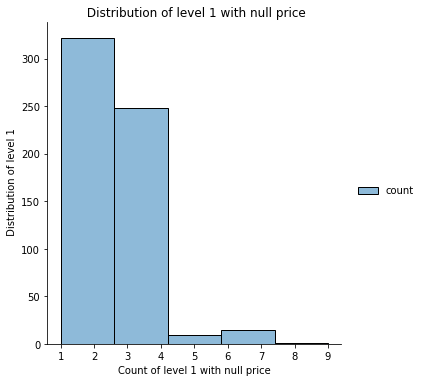

In [ ]:
# Distribution of level 1 with null price

sns.displot(data=level1_with_null_price,bins=5)

plt.xlabel("Count of level 1 with null price")
plt.ylabel(" Distribution of level 1")
plt.title(" Distribution of level 1 with null price")

In [ ]:
# top 10 level 1 with null price
top10_level1_with_null_price = level1_with_null_price.loc[:10]
top10_level1_with_null_price 


,level_1,count
0,U3dlYXRzaGlydA,9
1,U29ja3M,7
2,Q2xlYW5pbmcgY2xvdGg,7
3,U3Bvb24sIEtuaWZlIGFuZCBGb3Jr,7
4,TG9uZyBzbGVldmUgdGVl,6
5,SW1tdW5pdHkgZ3VtbWllcw,6
6,RGVuaW0gSmFja2V0LyBUcnVja2VyIEphY2tldA,6
7,SG9vZGll,6
8,Rm9ybWFsIFBhbnRz,6
9,Rm9ybWFsIFN1aXRz,6


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

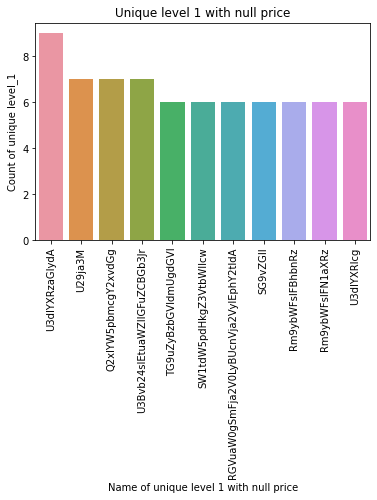

In [ ]:
# top 10 level 1 with null price

sns.barplot(data=top10_level1_with_null_price,x = 'level_1',y = 'count')

plt.xlabel("Name of unique level 1 with null price")
plt.ylabel("Count of unique level_1")
plt.title("Unique level 1 with null price")
plt.xticks(rotation=90)

# EDA on data frame with non null prices in prices_string column

In [ ]:
pd.set_option('display.max_rows', 15)

In [ ]:
len(df[~df['price_string'].isnull()])/len(df)

0.40160349854227406

In [ ]:
# creating copy of dataframe df with alias df1

df1 = df.copy()

In [ ]:
df1.loc[1:20]

,uuid,price_string,product_type,level_1,category
1,ab313969-02cc-48b2-9daf-0054efb70b92,<NA>,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw
5,389d9f75-cc3f-4bd2-94f7-93e381a3bed5,<NA>,TmF0dXJhbCBTd2VldGVuZXJzLyBTdWdhcg,TW9uayBGcnVpdA,Z3JvY2VyaWVz
...,...,...,...,...,...
16,7bad39f5-74b9-4611-afb9-46fb135190cd,<NA>,UGx1cyBzaXplIHdlYXIgZHJlc3M,RHJlc3M,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
17,da7f0d13-ec69-4f1a-a97a-24f1a26e91ce,$13.99,TnV0cyAtIENhc2hld3M,Q2FzaGV3cw,Z3JvY2VyaWVz
18,8c6eea03-327a-466a-bfa9-9f7712a402de,$6.95,TWFrZXVwIGFwcGxpY2F0b3I,TWFrZXVwIGFwcGxpY2F0b3I,QXJ0IHN1cHBsaWVz
19,524886b5-7cc2-4a57-be26-f021f083889a,<NA>,TWF0ZXJuaXR5IFBhZHM,UG9zdHBhcnR1bSBQYWRz,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl


# Creating seperate dataframe with name "non_null_prices_df" containing non null prices 

In [ ]:
non_null_prices_df = df1[~df1['price_string'].isnull()]

In [ ]:
non_null_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 2 to 13511
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uuid          551 non-null    object
 1   price_string  551 non-null    string
 2   product_type  551 non-null    object
 3   level_1       550 non-null    object
 4   category      551 non-null    object
dtypes: object(4), string(1)
memory usage: 25.8+ KB


In [ ]:
non_null_prices_df['price_string'].value_counts()

$0.00      24
$89        12
$9.99      10
$3.99       9
$80.00      8
           ..
$98.00      1
$23.99      1
$14.50      1
$119.00     1
$268.00     1
Name: price_string, Length: 248, dtype: Int64

In [ ]:
def modify_price(x):
  '''add $ sign to Correct Product Prices in the correct format (eg: $56)'''

  if x[0]!='$':
    x1 = "$"+ x
    return x1
  else:
    return x

#Correcting Product Prices in the correct format (eg: $56)

In [ ]:
# modifying price_string column to Correct Product Prices in the correct format (eg: $56)

non_null_prices_df['price_string'] = non_null_prices_df['price_string'].apply(modify_price)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
non_null_prices_df['price_string'].value_counts()

$0.00      24
$89        12
$9.99      10
$3.99       9
$38.00      8
           ..
$200        1
$16.00      1
$70.00      1
$79.00      1
$268.00     1
Name: price_string, Length: 243, dtype: int64

In [ ]:
non_null_prices_df.head()

,uuid,price_string,product_type,level_1,category
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,$11.50,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw
6,9599f1a9-d406-43eb-89f5-9b1c0af1ac9a,$24.99,TW9wcyBhbmQgYnJvb21z,TW9w,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
7,35799087-f6f4-4ca2-abfe-cbb5c27d2f1a,$148.00,V29tZW5zIFBhbnRz,V29tZW5zIFJlZ3VsYXIvQ2FzdWFsIFBhbnRz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz


In [ ]:
def create_currency(x):
  if x[0] == '$':
    return 'USD'
  else:
    'Not'

In [ ]:
# create currency name column for US dollar column value will be "USD"

non_null_prices_df['currency'] = non_null_prices_df['price_string'].apply(create_currency)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
non_null_prices_df['currency'].value_counts()

USD    551
Name: currency, dtype: int64

In [ ]:
def only_currency_value(x):
  '''converts currency to only value discard symbol such as $23.00 to  23.00'''
  if x[0] == '$':
    return x[1:]
  else:
    'Not'

In [ ]:
# create currency value column for price

non_null_prices_df['value'] = non_null_prices_df['price_string'].apply(only_currency_value)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
non_null_prices_df['value'].value_counts()

0.00      24
89        12
9.99      10
3.99       9
38.00      8
          ..
200        1
16.00      1
70.00      1
79.00      1
268.00     1
Name: value, Length: 243, dtype: int64

In [ ]:
# Changing data type of value column to float to do calculation

non_null_prices_df['value']=non_null_prices_df['value'].astype("float")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
non_null_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 2 to 13511
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uuid          551 non-null    object 
 1   price_string  551 non-null    object 
 2   product_type  551 non-null    object 
 3   level_1       550 non-null    object 
 4   category      551 non-null    object 
 5   currency      551 non-null    object 
 6   value         551 non-null    float64
dtypes: float64(1), object(6)
memory usage: 34.4+ KB


# Distribution of all prices

Text(0.5, 1.0, 'Title : Distribution of price')

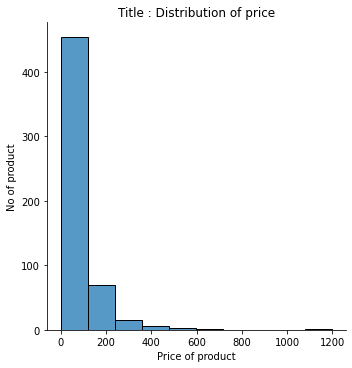

In [ ]:
#Distribution of price

sns.displot(non_null_prices_df['value'],bins= 10)

plt.xlabel("Price of product")
plt.ylabel("No of product")
plt.title("Title : Distribution of price")

In [ ]:
non_null_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 2 to 13511
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uuid          551 non-null    object 
 1   price_string  551 non-null    object 
 2   product_type  551 non-null    object 
 3   level_1       550 non-null    object 
 4   category      551 non-null    object 
 5   currency      551 non-null    object 
 6   value         551 non-null    float64
dtypes: float64(1), object(6)
memory usage: 34.4+ KB


# Count of products with non null prices in each unique product type

In [ ]:
#creating df product type with count
product_type_count = pd.DataFrame(non_null_prices_df.groupby('product_type')['value'].size().sort_values(ascending= False).reset_index())

In [ ]:
product_type_count = product_type_count.rename(columns={'value':'count'})

In [ ]:
product_type_count

,product_type,count
0,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,14
1,d29tZW5zIE91dGVyd2Vhcg,13
2,Q29va2luZyBVdGVuc2lscw,11
3,RmFjaWFsIENsZWFuc2Vycw,9
4,V29tZW5zIFBhbnRz,9
...,...,...
204,UEVUIFNUQUlOIGFuZCBPRE9SIFJFTU9WRVIgLSBQT1VS,1
205,U3lydXBz,1
206,QmxvY2sgVG95cw,1
207,U3Vuc2NyZWVu,1


Text(0.5, 1.0, 'Title : Distribution of count across product type with prices')

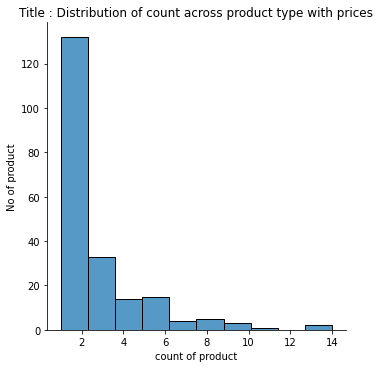

In [ ]:
#distribution plot of avg_price
sns.displot(data=product_type_count, x = "count",bins = 10)
plt.xlabel("count of product")
plt.ylabel("No of product")
plt.title("Title : Distribution of count across product type with prices")

In [ ]:
# top 10 product type with highest count
top_10_product_type_count = product_type_count[:10]
top_10_product_type_count

,product_type,count
0,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,14
1,d29tZW5zIE91dGVyd2Vhcg,13
2,Q29va2luZyBVdGVuc2lscw,11
3,RmFjaWFsIENsZWFuc2Vycw,9
4,V29tZW5zIFBhbnRz,9
5,WW9nYSBBY2Nlc3Nvcmllcy8gR2Vhcg,9
6,bWVucyBPdXRlcndlYXI,8
7,V29tZW5zIFVuZGVyZ2FybWVudHM,8
8,QnJ1c2hlcw,8
9,RHJlc3Nlcw,8


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

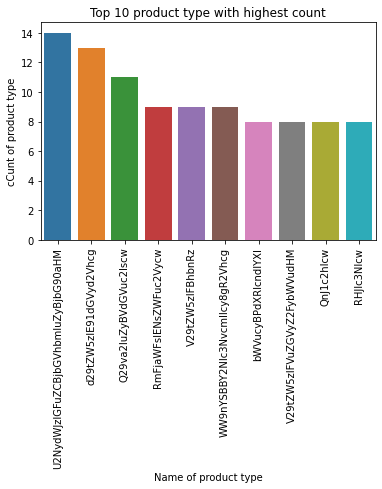

In [ ]:
# Visualisation top 10 product type with highest count bar plot
sns.barplot(data=top_10_product_type_count,x = 'product_type',y = 'count')
plt.xlabel("Name of product type")
plt.ylabel("cCunt of product type")
plt.title("Top 10 product type with highest count")
plt.xticks(rotation=90)

# Avg price of products with prices in each Product Type

In [ ]:
#creating df product ty with avg price
product_type_avg_price = pd.DataFrame(non_null_prices_df.groupby('product_type')['value'].mean().sort_values(ascending= False).reset_index())

In [ ]:
product_type_avg_price = product_type_avg_price.rename(columns={'value':'avg_price'})

In [ ]:
#keeping df product type with avg price greater than 0
product_type_avg_price = product_type_avg_price[product_type_avg_price['avg_price']>0]

Text(0.5, 1.0, 'Title : Distribution of avg price across product type')

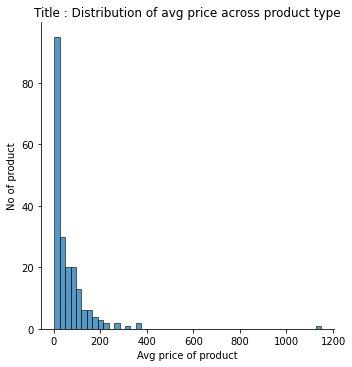

In [ ]:
#distribution plot of avg_price
sns.displot(data=product_type_avg_price, x = "avg_price")
plt.xlabel("Avg price of product")
plt.ylabel("No of product")
plt.title("Title : Distribution of avg price across product type")

In [ ]:
# top 10 product type with highest avg value
top_10_product_type = product_type_avg_price[:10]
top_10_product_type


,product_type,avg_price
0,TWF0cmVzc2Vz,1148.500000
1,U3Ryb2xsZXJzL0NhciBzZWF0cy8gQWNjZXNzb3JpZXM,375.996667
2,U3VyZiBzdWl0cw,359.000000
3,V29tZW5zIHB1cnNlL3NhdGNoZWw,327.500000
4,QmFieSBNYXR0cmVzc2Vz,279.000000
5,bWVucyBPdXRlcndlYXI,268.875000
6,RGVodW1pZGlmaWVycw,226.636667
7,VHJhdmVsIEJhZw,225.000000
8,Qm9vdHM,194.333333
9,QmVkc2hlZXRz,192.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

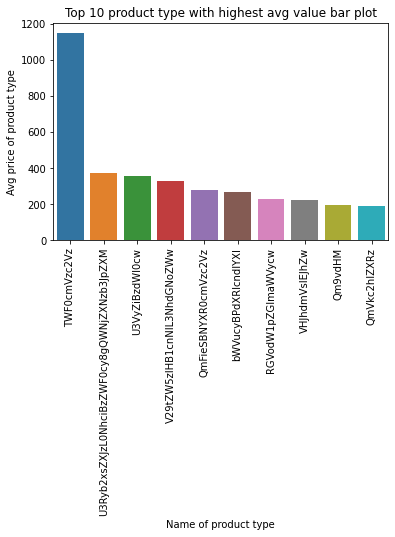

In [ ]:
# Visualisation top 10 product type with highest avg value bar plot
sns.barplot(data=top_10_product_type,x = 'product_type',y = 'avg_price')
plt.xlabel("Name of product type")
plt.ylabel("Avg price of product type")
plt.title("Top 10 product type with highest avg value bar plot")
plt.xticks(rotation=90)

# Count of unique category with non null prices

In [ ]:
#creating df category with count of non null prices

category_count = pd.DataFrame(non_null_prices_df.groupby('category')['value'].size().sort_values(ascending= False).reset_index())

category_count = category_count.rename(columns={'value':'count'})

category_count

,category,count
0,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,186
1,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,75
2,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,70
3,Z3JvY2VyaWVz,48
4,a2l0Y2hpbmcgYW5kIGRpbmluZw,34
5,SGVhbHRo,29
6,VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,20
7,QXJ0IHN1cHBsaWVz,19
8,VG95cyBhbmQgR2FtZXM,19
9,cGV0IHN1cHBsaWVz,16


Text(0.5, 1.0, 'Title : Distribution of count across category with prices')

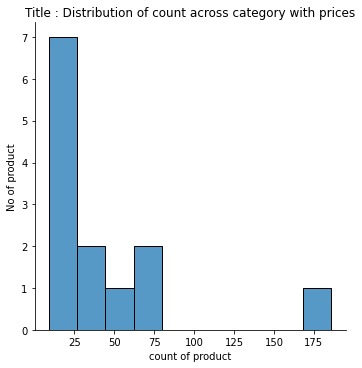

In [ ]:
#distribution plot of avg_price
sns.displot(data=category_count, x = "count",bins = 10)
plt.xlabel("count of product")
plt.ylabel("No of product")
plt.title("Title : Distribution of count across category with prices")

In [ ]:
# top 10 category_count with highest count of non null prices
top_10_category_count = category_count[:10]
top_10_category_count

,category,count
0,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,186
1,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,75
2,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,70
3,Z3JvY2VyaWVz,48
4,a2l0Y2hpbmcgYW5kIGRpbmluZw,34
5,SGVhbHRo,29
6,VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,20
7,QXJ0IHN1cHBsaWVz,19
8,VG95cyBhbmQgR2FtZXM,19
9,cGV0IHN1cHBsaWVz,16


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

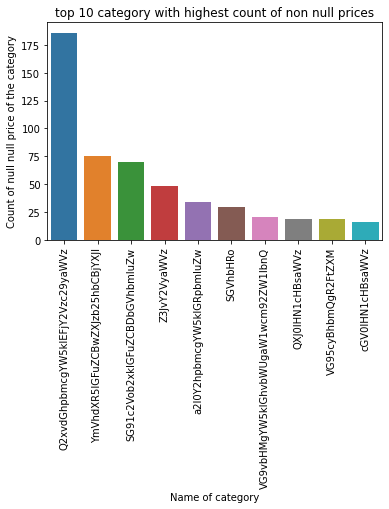

In [ ]:
# Visualisation top 10 category_count with highest count of non null prices
sns.barplot(data=top_10_category_count,x = 'category',y = 'count')
plt.xlabel("Name of category")
plt.ylabel("Count of null null price of the category")
plt.title("top 10 category with highest count of non null prices")
plt.xticks(rotation=90)

# Unique Categories with average price of product

In [ ]:
#creating df category with avg price
category_avg_price = pd.DataFrame(non_null_prices_df.groupby('category')['value'].mean().sort_values(ascending= False).reset_index())

In [ ]:
#list of category with avg price of products
category_avg_price = category_avg_price.rename(columns={'value':'avg_price'})
category_avg_price

,category,avg_price
0,QmFieWNhcmU,163.688889
1,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,125.413871
2,VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,82.223500
3,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,76.199000
4,RWxlY3Ryb25pY3M,60.258182
5,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,34.745067
6,SGVhbHRo,32.557586
7,VG95cyBhbmQgR2FtZXM,32.448947
8,b2ZmaWNlIHByb2R1Y3Rz,20.480000
9,QXJ0IHN1cHBsaWVz,19.471053


Text(0.5, 1.0, 'Title : Distribution of avg price across category')

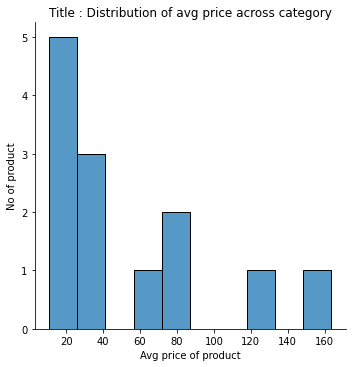

In [ ]:
#distribution plot of avg_price with respect to category
sns.displot(data=category_avg_price, x = "avg_price",bins = 10)
plt.xlabel("Avg price of product")
plt.ylabel("No of product")
plt.title("Title : Distribution of avg price across category")

In [ ]:
# top 10 category with highest avg value
top_10_category = category_avg_price[:10]
top_10_category

,category,avg_price
0,QmFieWNhcmU,163.688889
1,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,125.413871
2,VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ,82.223500
3,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,76.199000
4,RWxlY3Ryb25pY3M,60.258182
5,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl,34.745067
6,SGVhbHRo,32.557586
7,VG95cyBhbmQgR2FtZXM,32.448947
8,b2ZmaWNlIHByb2R1Y3Rz,20.480000
9,QXJ0IHN1cHBsaWVz,19.471053


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

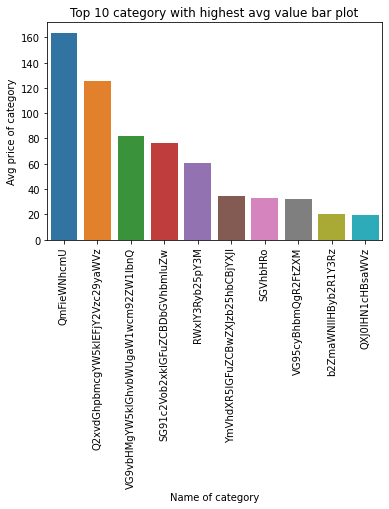

In [ ]:
# Visualisation top 10 cateory with highest avg price 
sns.barplot(data=top_10_category,x = 'category',y = 'avg_price')
plt.xlabel("Name of category")
plt.ylabel("Avg price of category")
plt.title("Top 10 category with highest avg value bar plot")
plt.xticks(rotation=90)

#Count of level 1 with non null prices

In [ ]:
non_null_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 2 to 13511
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uuid          551 non-null    object 
 1   price_string  551 non-null    object 
 2   product_type  551 non-null    object 
 3   level_1       550 non-null    object 
 4   category      551 non-null    object 
 5   currency      551 non-null    object 
 6   value         551 non-null    float64
dtypes: float64(1), object(6)
memory usage: 34.4+ KB


In [ ]:
#creating df category with count of non null prices

level1_count = pd.DataFrame(non_null_prices_df.groupby('level_1')['value'].size().sort_values(ascending= False).reset_index())

level1_count = level1_count.rename(columns={'value':'count'})

level1_count

,level_1,count
0,U3Bvb24sIEtuaWZlIGFuZCBGb3Jr,6
1,TWVucyBTdHJhaWdodCBGaXQgamVhbnM,5
2,Q2xlYW5pbmcgY2xvdGg,5
3,UHVmZmVyIEphY2tldA,5
4,Q2FzdWFsIEphY2tldA,4
...,...,...
361,U2NydWIgYnJ1c2g,1
362,RG9nIFNoYW1wb28,1
363,U2hhbXBvbw,1
364,U2hhcnBlbmVycw,1


Text(0.5, 1.0, 'Title : Distribution of count across level1 with prices')

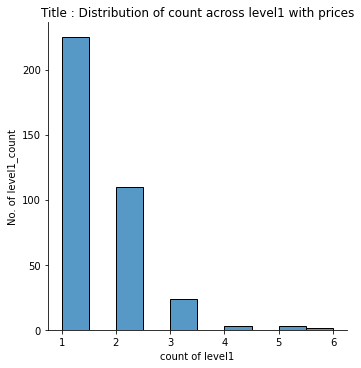

In [ ]:
#distribution plot of level 1
sns.displot(data=level1_count, x = "count",bins = 10)
plt.xlabel("count of level1")
plt.ylabel("No. of level1_count")
plt.title("Title : Distribution of count across level1 with prices")

In [ ]:
# top 10 level1 with highest count of non null prices
top_10_level1_count = level1_count[:10]
top_10_level1_count

,level_1,count
0,U3Bvb24sIEtuaWZlIGFuZCBGb3Jr,6
1,TWVucyBTdHJhaWdodCBGaXQgamVhbnM,5
2,Q2xlYW5pbmcgY2xvdGg,5
3,UHVmZmVyIEphY2tldA,5
4,Q2FzdWFsIEphY2tldA,4
5,U2NydWJz,4
6,UHVmZmVyIFZlc3Q,4
7,eW9nYSBzdHJhcHM,3
8,Qm9keSBTY3J1Yg,3
9,V29tZW5zIFN0cmFpZ2h0IGZpdCBKZWFucw,3


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

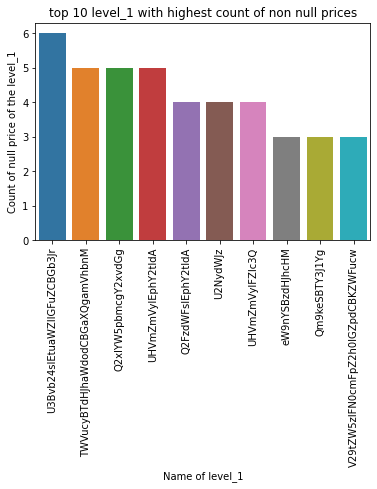

In [ ]:
# Visualisation top 10 category_count with highest count of non null prices
sns.barplot(data=top_10_level1_count,x = 'level_1',y = 'count')
plt.xlabel("Name of level_1")
plt.ylabel("Count of null price of the level_1")
plt.title("top 10 level_1 with highest count of non null prices")
plt.xticks(rotation=90)

# Unique level1 with average price of product

In [ ]:
#creating level1 with avg price
level_1_avg_price = pd.DataFrame(non_null_prices_df.groupby('level_1')['value'].mean().sort_values(ascending= False).reset_index())

In [ ]:
#list of level_1 with avg price of products
level_1_avg_price = level_1_avg_price.rename(columns={'value':'avg_price'})
level_1_avg_price

,level_1,avg_price
0,TWF0cmVzc2Vz,1148.500000
1,U3Ryb2xsZXJz,619.000000
2,UGFya2Fz,515.666667
3,bGluZW4gYmVkc2hlZXRz,389.000000
4,TWVucyBzdXJmIHN1aXQ,379.000000
...,...,...
361,RXllIEJyb3cgUGVuY2ls,0.000000
362,bGluZW4gcGlsbG93Y2FzZQ,0.000000
363,RmFjZSBQcmltZXI,0.000000
364,ZG9nIEJlZC9NYXR0cmVzc2Vz,0.000000


Text(0.5, 1.0, 'Title : Distribution of avg price across level_1')

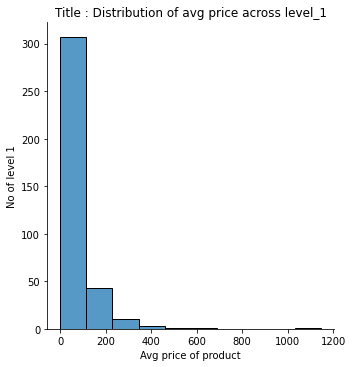

In [ ]:
#distribution plot of avg_price with respect to level_1
sns.displot(data=level_1_avg_price, x = "avg_price",bins = 10)
plt.xlabel("Avg price of product")
plt.ylabel("No of level 1")
plt.title("Title : Distribution of avg price across level_1")

In [ ]:
# top 10 category with highest avg value in level_1
top_10_level_1 = level_1_avg_price[:10]
top_10_level_1

,level_1,avg_price
0,TWF0cmVzc2Vz,1148.500000
1,U3Ryb2xsZXJz,619.000000
2,UGFya2Fz,515.666667
3,bGluZW4gYmVkc2hlZXRz,389.000000
4,TWVucyBzdXJmIHN1aXQ,379.000000
5,SGVtcCBiZWRzaGVldHM,379.000000
6,aGVtcCBkdXZldCBjb3Zlcg,339.000000
7,V29tZW5zIHN1cmYgc3VpdA,339.000000
8,UHVyc2Uvc2F0Y2hlbA,327.500000
9,V29tZW5zIFBhcmthcw,299.000000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

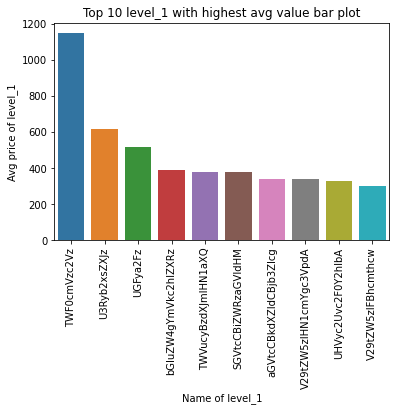

In [ ]:
# Visualisation top 10 level_1 with highest avg price 

sns.barplot(data=top_10_level_1,x = 'level_1',y = 'avg_price')

plt.xlabel("Name of level_1")
plt.ylabel("Avg price of level_1")
plt.title("Top 10 level_1 with highest avg value bar plot")
plt.xticks(rotation=90)

# Final dataframe combined and cleaned

In [ ]:
data_frames = [price_null_df,non_null_prices_df]
df_optimised = pd.concat(data_frames)

In [ ]:
df_optimised.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372 entries, 0 to 13511
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uuid          1372 non-null   object 
 1   price_string  551 non-null    object 
 2   product_type  1372 non-null   object 
 3   level_1       1368 non-null   object 
 4   category      1372 non-null   object 
 5   currency      551 non-null    object 
 6   value         551 non-null    float64
dtypes: float64(1), object(6)
memory usage: 85.8+ KB


In [ ]:
df_optimised.head()

,uuid,price_string,product_type,level_1,category,currency,value
0,638744a4-b0ae-4166-8cb6-5c063c862036,<NA>,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M,NaN,NaN
1,ab313969-02cc-48b2-9daf-0054efb70b92,<NA>,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw,NaN,NaN
5,389d9f75-cc3f-4bd2-94f7-93e381a3bed5,<NA>,TmF0dXJhbCBTd2VldGVuZXJzLyBTdWdhcg,TW9uayBGcnVpdA,Z3JvY2VyaWVz,NaN,NaN
13,1f2766ec-0a27-43f8-b28b-77a44492ead1,<NA>,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,U2NydWJz,SG91c2Vob2xkIGFuZCBDbGVhbmluZw,NaN,NaN
16,7bad39f5-74b9-4611-afb9-46fb135190cd,<NA>,UGx1cyBzaXplIHdlYXIgZHJlc3M,RHJlc3M,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz,NaN,NaN
